In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams["figure.figsize"] = (5, 5)

<h3>Data loading</h3>

In [2]:
df = pd.read_csv("C:/Users/skart/Downloads/hyderabad-city-power-consumptions/Hyderabad_Power_Train.csv")
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,NaN,74.5,0.080,0.062,NaN,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,NaN,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,NaN,0.085,27335.69620,17872.34043,18442.40964


<h3>Analysing DateTime feature</h3>

In [3]:
Date_Time = pd.DatetimeIndex(df["DateTime"])
df["Time"] = Date_Time.time
df["Date"] = Date_Time.date

df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Time,Date
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,00:00:00,2017-01-01
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,00:10:00,2017-01-01
2,2017-01-01 00:20:00,NaN,74.5,0.080,0.062,NaN,29128.10127,19006.68693,19668.43373,00:20:00,2017-01-01
3,2017-01-01 00:30:00,6.121,75.0,0.083,NaN,0.096,28228.86076,18361.09422,18899.27711,00:30:00,2017-01-01
4,2017-01-01 00:40:00,5.921,75.7,0.081,NaN,0.085,27335.69620,17872.34043,18442.40964,00:40:00,2017-01-01


In [4]:
def date(i):
    i = str(i)
    i = i.split('-')
    return np.array([int(i[1]), int(i[2])])

def dayOfWeek(i):
    i = str(i)
    d = pd.Timestamp(i)
    return d.dayofweek

df["Date_day"] = df["Date"].apply(lambda x : date(x)[1])
df["Date_month"] = df["Date"].apply(lambda x : date(x)[0])
df["Date_week_day"] = df["Date"].apply(lambda x : dayOfWeek(x))

df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Time,Date,Date_day,Date_month,Date_week_day
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,00:00:00,2017-01-01,1,1,6
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,00:10:00,2017-01-01,1,1,6
2,2017-01-01 00:20:00,NaN,74.5,0.080,0.062,NaN,29128.10127,19006.68693,19668.43373,00:20:00,2017-01-01,1,1,6
3,2017-01-01 00:30:00,6.121,75.0,0.083,NaN,0.096,28228.86076,18361.09422,18899.27711,00:30:00,2017-01-01,1,1,6
4,2017-01-01 00:40:00,5.921,75.7,0.081,NaN,0.085,27335.69620,17872.34043,18442.40964,00:40:00,2017-01-01,1,1,6


In [5]:
def time(i):
    i = str(i)
    i = i.split(':')
    return np.array([int(i[0]), int(i[1])])

df["Time_hour"] = df["Time"].apply(lambda x : time(x)[0])
df["Time_minutes"] = df["Time"].apply(lambda x : time(x)[1])

df = df.drop(columns = ["DateTime", "Time", "Date"])
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Date_day,Date_month,Date_week_day,Time_hour,Time_minutes
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1,1,6,0,0
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1,1,6,0,10
2,NaN,74.5,0.080,0.062,NaN,29128.10127,19006.68693,19668.43373,1,1,6,0,20
3,6.121,75.0,0.083,NaN,0.096,28228.86076,18361.09422,18899.27711,1,1,6,0,30
4,5.921,75.7,0.081,NaN,0.085,27335.69620,17872.34043,18442.40964,1,1,6,0,40


In [6]:
df.shape

(47596, 13)

<h3>Handling NaN values</h3>

In [7]:
df.isnull().sum()

Temperature                  5725
Humidity                     3611
Wind Speed                   4412
general diffuse flows        5653
diffuse flows                4048
Zone 1 Power Consumption        0
Zone 2  Power Consumption       0
Zone 3  Power Consumption       0
Date_day                        0
Date_month                      0
Date_week_day                   0
Time_hour                       0
Time_minutes                    0
dtype: int64

In [8]:
df = df.fillna("NULL")
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Date_day,Date_month,Date_week_day,Time_hour,Time_minutes
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1,1,6,0,0
1,6.414,74.5,0.083,0.07,0.085,29814.68354,19375.07599,20131.08434,1,1,6,0,10
2,NULL,74.5,0.08,0.062,NULL,29128.10127,19006.68693,19668.43373,1,1,6,0,20
3,6.121,75.0,0.083,NULL,0.096,28228.86076,18361.09422,18899.27711,1,1,6,0,30
4,5.921,75.7,0.081,NULL,0.085,27335.69620,17872.34043,18442.40964,1,1,6,0,40


In [9]:
def fillNull(X):
    for i in range(len(X)):
        if X[i] == "NULL":
            l_limit = i-1
            r_limit = i+1
            while X[l_limit] == "NULL":
                l_limit = l_limit - 1
            while X[r_limit] == "NULL":
                r_limit = r_limit + 1
            X[i] = (X[l_limit]+X[r_limit])/2

In [10]:
fillNull(df["Temperature"])
fillNull(df["Humidity"])
fillNull(df["Wind Speed"])
fillNull(df["general diffuse flows"])
fillNull(df["diffuse flows"])

C:\Users\skart\AppData\Local\Temp\ipykernel_4856\3576912425.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = (X[l_limit]+X[r_limit])/2


In [11]:
# df.isnull().sum()
(df == "NULL").sum()

Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
Date_day                     0
Date_month                   0
Date_week_day                0
Time_hour                    0
Time_minutes                 0
dtype: int64

<h3>Visualizing features</h3>

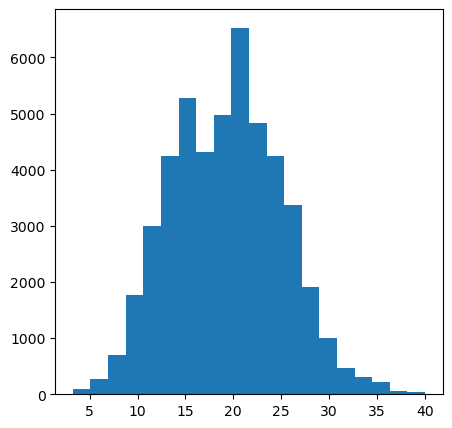

<Figure size 500x500 with 0 Axes>

In [12]:
plt.hist(df["Temperature"], bins = 20)
plt.show()
plt.clf()

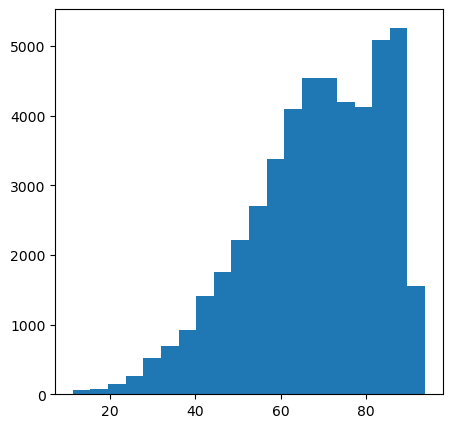

<Figure size 500x500 with 0 Axes>

In [13]:
plt.hist(df["Humidity"], bins = 20)
plt.show()
plt.clf()

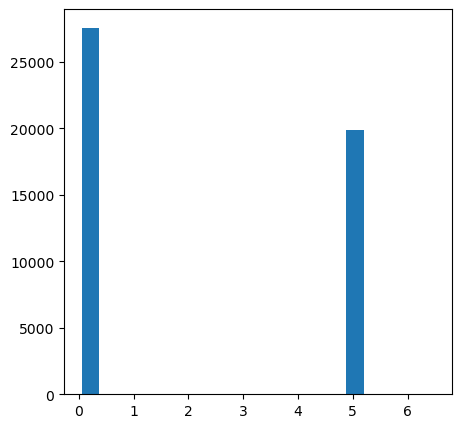

<Figure size 500x500 with 0 Axes>

In [14]:
plt.hist(df["Wind Speed"], bins = 20)
plt.show()
plt.clf()

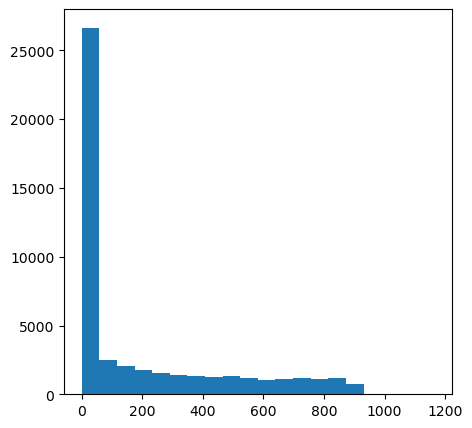

<Figure size 500x500 with 0 Axes>

In [15]:
plt.hist(df["general diffuse flows"], bins = 20)
plt.show()
plt.clf()

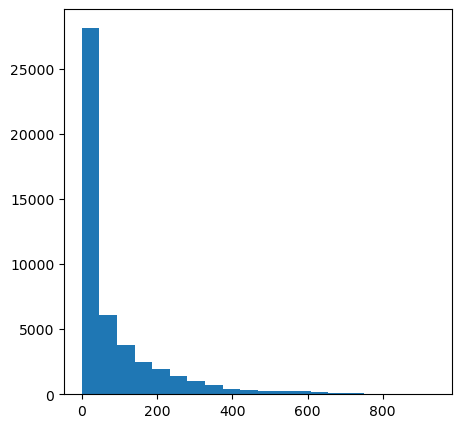

<Figure size 500x500 with 0 Axes>

In [16]:
plt.hist(df["diffuse flows"], bins = 20)
plt.show()
plt.clf()

In [17]:
m = len(df.index)
n = len(df.count(axis = 0)) - 3
print(m, n)

47596 10


<h3>Fitting Multi Linear Perceptron model</h3>

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error as mape

In [19]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption', 'Date_day',
       'Date_month', 'Date_week_day', 'Time_hour', 'Time_minutes'],
      dtype='object')

In [20]:
X = df[["Date_day", "Date_month", "Date_week_day", "Time_hour", "Time_minutes", "Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows"]]
y = df[["Zone 1 Power Consumption", "Zone 2  Power Consumption", "Zone 3  Power Consumption"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [21]:
model1 = MLPRegressor(max_iter = 800)

y_train1 = np.array(y_train[["Zone 1 Power Consumption"]])
y_train1 = y_train1.T
y_train1 = y_train1.ravel()

model1.fit(X_train, y_train1)

C:\Users\skart\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(max_iter=800)

In [22]:
model2 = MLPRegressor(max_iter = 800)

y_train2 = np.array(y_train[["Zone 2  Power Consumption"]])
y_train2 = y_train2.T
y_train2 = y_train2.ravel()

model2.fit(X_train, y_train2)

C:\Users\skart\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(max_iter=800)

In [23]:
model3 = MLPRegressor(max_iter = 800)

y_train3 = np.array(y_train[["Zone 3  Power Consumption"]])
y_train3 = y_train3.T
y_train3 = y_train3.ravel()

model3.fit(X_train, y_train3)

C:\Users\skart\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(max_iter=800)

<h3>Predictions on Test data</h3>

In [24]:
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)
predict3 = model3.predict(X_test)
print(predict1)
print(predict2)
print(predict3)

[22992.43300881 25744.38041953 35340.68007078 ... 21985.26867213
 26271.34754902 28168.08883374]
[15798.42535676 15014.93382375 20319.47591852 ... 12189.76120171
 15801.3571418  16507.10811539]
[ 6788.92449892 15729.77771845 16823.56543663 ... 13868.99397697
 13323.60578916 14492.26562001]


<h3>Accuracy measurement</h3>

In [27]:
y1 = np.asarray(y_test[["Zone 1 Power Consumption"]])
y2 = np.asarray(y_test[["Zone 2  Power Consumption"]])
y3 = np.asarray(y_test[["Zone 3  Power Consumption"]])

print(r2_score(y1, predict1))
print(r2_score(y2, predict2))
print(r2_score(y3, predict3))

print(mape(y1, predict1))
print(mape(y2, predict2))
print(mape(y3, predict3))

0.731259740456442
0.6944662170501497
0.7762743429065928
0.08728403298988598
0.10390780812541048
0.1333146326036431
